In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quora-question-pairs/train.csv.zip
/kaggle/input/quora-question-pairs/sample_submission.csv.zip
/kaggle/input/quora-question-pairs/test.csv
/kaggle/input/quora-question-pairs/test.csv.zip


In [2]:
if os.path.exists('/kaggle/working/submission.csv'):
    os.remove('/kaggle/working/submission.csv')
    print("File deleted.")
else:
    print("File not found.")

File not found.


import zipfile

zip_path = "/kaggle/input/quora-question-pairs/train.csv.zip"
extract_path = "/kaggle/working/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [3]:
df = pd.read_csv('/kaggle/input/quora-question-pairs/train.csv.zip')
df.shape

(404290, 6)

In [4]:
df = df.sample(30000)

In [5]:
df.info

<bound method DataFrame.info of             id    qid1    qid2  \
30590    30590   33359   47300   
373874  373874  504726  504727   
143802  143802  227748  227749   
31848    31848   56761   58687   
375107  375107  506096  506097   
...        ...     ...     ...   
95666    95666  159485  159486   
146217  146217  231022  231023   
240593  240593  162974  352437   
350973  350973  479770  479771   
37394    37394   68053   68054   

                                                question1  \
30590                     How do I get my English better?   
373874  What is the best stock market advice you have ...   
143802       What is the reaction between AgCl and NH4OH?   
31848       What are better forms of an education system?   
375107              What are the top mobile social games?   
...                                                   ...   
95666   Physics: What is a layman's explanation of the...   
146217     What are the major components of money market?   
240593  Ho

In [6]:
#missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [7]:
#check for duplicates
df.duplicated().sum()

0

In [8]:
df['is_duplicate'].value_counts()

is_duplicate
0    18866
1    11134
Name: count, dtype: int64

In [9]:
df['is_duplicate'].count()

30000

Text(0, 0.5, 'Frequency')

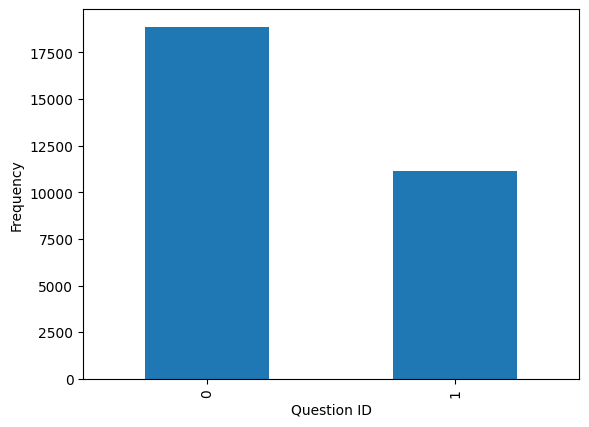

In [10]:
import matplotlib.pyplot as plt
df['is_duplicate'].value_counts().plot(kind='bar')
plt.xlabel("Question ID")
plt.ylabel("Frequency")

In [11]:
# Unique questions
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print(f'Number of unique questions {np.unique(qid).shape[0]}')

# Repeted questions
x = qid.value_counts()>1
print(f'Number of questions repeated {x[x].shape[0]}')


Number of unique questions 55412
Number of questions repeated 3432


In [12]:
qid.value_counts().values

array([14, 12,  8, ...,  1,  1,  1])

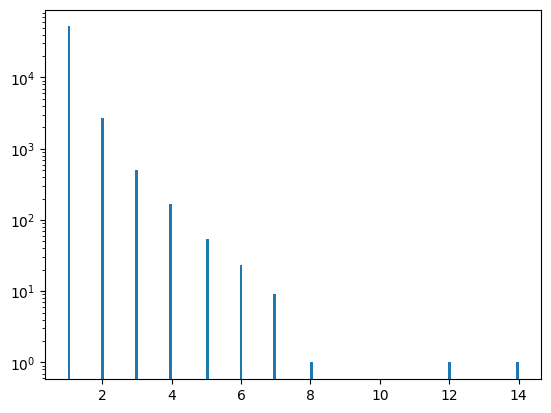

In [13]:
plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()

qid1 , qid2, question1, question2, is_duplicate <br>
              bow        bow        randomforest

In [14]:
# Feature engineering

In [15]:
ques_df = df[['question1','question2']]
ques_df.head()


,question1,question2
30590,How do I get my English better?,How do I speak English fluently?
373874,What is the best stock market advice you have ...,What is the best stock advice you ever received?
143802,What is the reaction between AgCl and NH4OH?,What is the reaction between CuOH and Oxygen?
31848,What are better forms of an education system?,Are there better alternatives to the current e...
375107,What are the top mobile social games?,What is the best mobile social gaming network?


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# Merge all questions into one list
questions = list(ques_df['question1'].fillna("")) + list(ques_df['question2'].fillna(""))

# Vectorize
cv = CountVectorizer(max_features=3000)
q_vectors = cv.fit_transform(questions).toarray()

# Split back into q1 and q2 arrays
half = len(q_vectors) // 2
q1_arr, q2_arr = np.vsplit(q_vectors, [half])

In [17]:
temp_df1 = pd.DataFrame(q1_arr, index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = ques_df.index)

temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
30590,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
373874,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
143802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31848,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
375107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95666,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
240593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
temp_df['is_duplicate'] = df['is_duplicate']
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
30590,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
373874,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
143802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31848,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
375107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95666,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
240593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# EDA


### Data Preprocessing & Transformation


In [20]:
temp_df.iloc[:,0:-1].values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
#importing and splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2, random_state=2)



### Model Selection & Evaluation

### Classification Models / Regression Models

In [22]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7366666666666667

In [24]:
#Random Forest Classifier
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [25]:
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7196666666666667

In [26]:
test_df = pd.read_csv('/kaggle/input/quora-question-pairs/test.csv.zip')
print(test_df.shape)

#test_df = test_df.sample(2345796)
print(test_df.shape)

/tmp/ipykernel_13/787706316.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv('/kaggle/input/quora-question-pairs/test.csv.zip')


(3563475, 3)
(3563475, 3)


In [27]:
test_df.duplicated().sum()

955535

In [28]:
test_df = test_df.drop_duplicates()

In [29]:
print(test_df.shape)

(2607940, 3)


In [30]:
from scipy.sparse import hstack

# Vectorize test questions (keep sparse!)
test_questions = list(test_df['question1'].fillna('')) + list(test_df['question2'].fillna(''))
test_vectors = cv.transform(test_questions)  # DO NOT call .toarray()

# Split into two sparse matrices
q1_test, q2_test = test_vectors[:len(test_df)], test_vectors[len(test_df):]

# Horizontally stack the sparse matrices
X_test = hstack([q1_test, q2_test])

In [31]:
# Predict on the Kaggle test set
y_pred = model.predict(X_test)
print("Predictions shape:", y_pred.shape)


Predictions shape: (2607940,)


In [32]:
submission = pd.DataFrame({
    'test_id': test_df['test_id'],    
    'is_duplicate': y_pred
})

submission.to_csv('submission.csv', index=False)

### Model Evaluation Metrics

### Pipelines